In [1]:
import scanpy as sc
import numpy as np
import random

random.seed(0)

In [8]:
import os
os.chdir(r'D:\R_Ordner\KTx Daten')
import os
print(os.path.abspath("")) 


D:\R_Ordner\KTx Daten


In [3]:
# transfer PT subclustered object to h5ad
adata_pt = sc.read_h5ad("D:/R_Ordner/KTx Daten/Ktx Objekte final/Maus/pt_mouse.h5ad")


['healthyPT' 'PT Injury m3' 'PT Injury m2' 'PT prolif' 'PT Injury m4'
 'PT Injury m1']


C:\Users\warum\AppData\Local\Temp\ipykernel_4684\3516579508.py:17: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata_pt.uns['iroot'] = 0


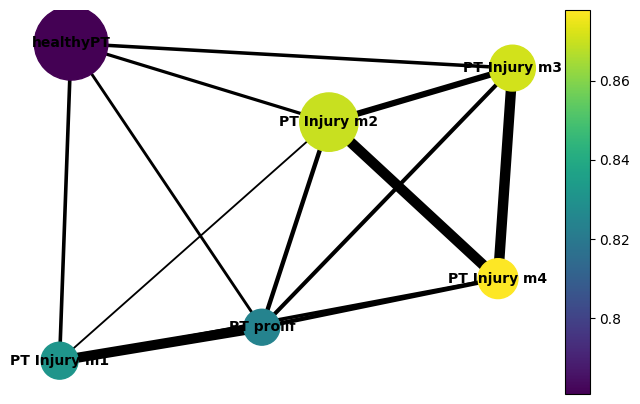

In [5]:

healthy_pt_clusters = ['PT S1', 'PT S2', 'PT S3', 'PT S3 med.']

adata_pt.obs['largersubct'] = adata_pt.obs['celltype_to_plot'].apply(
    lambda x: 'healthyPT' if x in healthy_pt_clusters else x
)

print(adata_pt.obs['largersubct'].unique())
sc.pp.highly_variable_genes(adata_pt, flavor="seurat", n_top_genes=500)
sc.tl.pca(adata_pt, mask_var="highly_variable")

sc.pp.neighbors(adata_pt, n_pcs=30)

sc.tl.diffmap(adata_pt)
# adapt for umap architechture
root_cells = adata_pt.obs[adata_pt.obs['celltype_to_plot'] == 'PT S3 med.'].index
adata_pt = adata_pt[root_cells.tolist() + [cell for cell in adata_pt.obs.index if cell not in root_cells], :]
adata_pt.uns['iroot'] = 0  

sc.tl.paga(adata_pt, groups='largersubct')
sc.tl.dpt(adata_pt)
sc.pl.paga(adata_pt, color='dpt_pseudotime', node_size_scale=6, edge_width_scale=1, threshold=0.15, cmap='viridis',  frameon=False)
# normalize for plotting

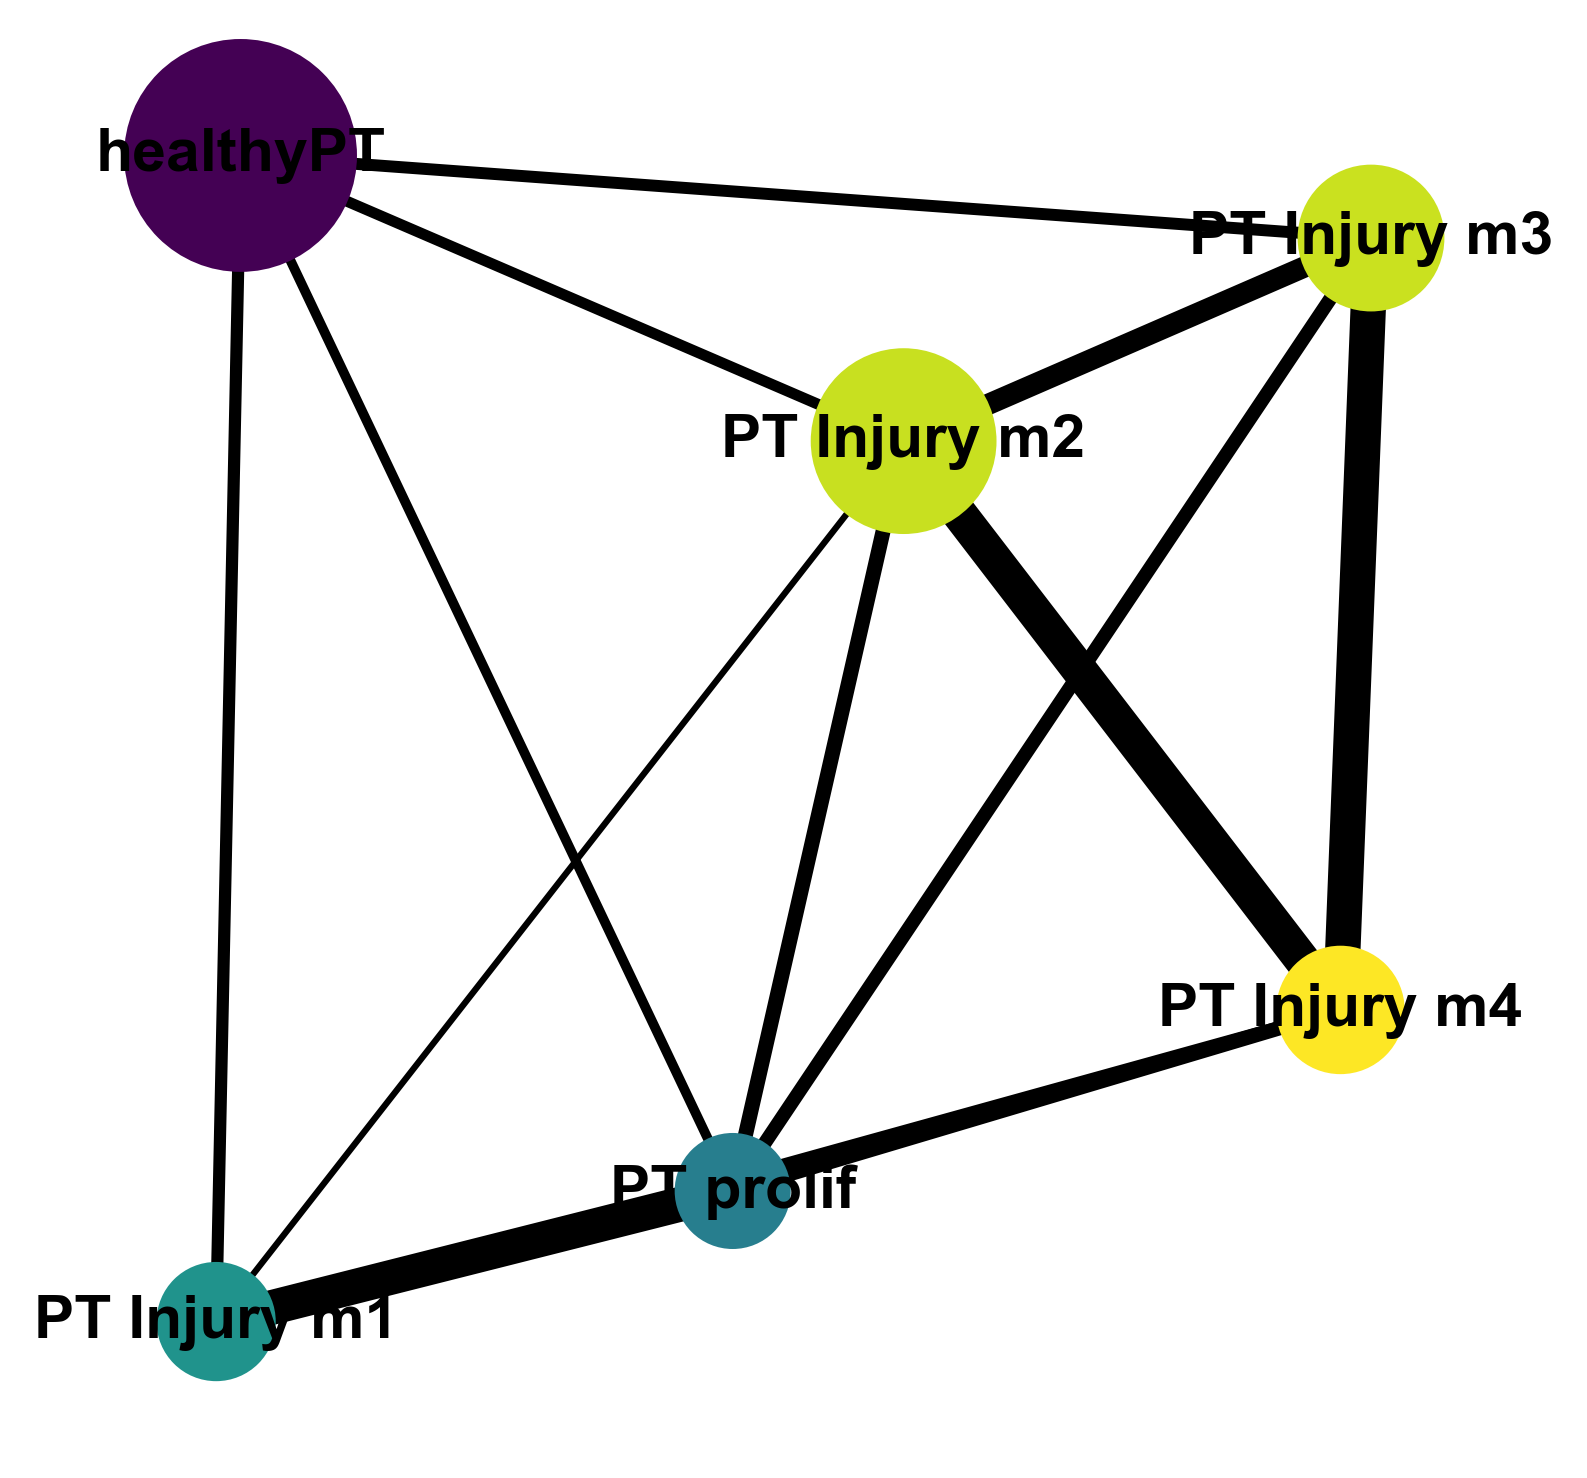

In [118]:
import scanpy as sc


sc.set_figure_params(figsize=(5, 5), dpi=170)
sc.pl.paga(adata_pt, 
           color='dpt_pseudotime', 
           node_size_scale=5, 
           edge_width_scale=1, 
           threshold=0.15, 
           cmap='viridis', 
           save='_PT_plot_no_labels_no_legend.png', 
           frameon=False, 
           labels=None,   
           colorbar=False)  
